### Import necessary packages

In [1]:
import calendar
import datetime as dt
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load data and perform cleaning

In [2]:
# Load unique orders data
unique_orders = pd.read_excel('../data/input/orders.xlsx')

In [3]:
# Check number of missing values in the unique orders dataset

# Initialize empty dictionary
na_dict = {}

# Get a count of missing values for each variable
for var in unique_orders.columns:
    total_na = unique_orders[var].isnull().sum()
    percent_na = (total_na/len(unique_orders))*100
    na_dict[var] = percent_na
    
na_dict

{'Order Number': 0.0,
 'Order Status': 0.0,
 'Order Date': 0.0,
 'Customer Note': 85.53230209281165,
 'Company (Billing)': 100.0,
 'Address 1&2 (Billing)': 0.0,
 'City (Billing)': 0.0,
 'State Code (Billing)': 0.0,
 'Postcode (Billing)': 67.42493175614194,
 'Country Code (Billing)': 0.0,
 'Address 1&2 (Shipping)': 0.18198362147406735,
 'City (Shipping)': 0.18198362147406735,
 'Payment Method Title': 0.0,
 'Order Subtotal Amount': 0.0,
 'Shipping Method Title': 1.4558689717925388,
 'Order Shipping Amount': 0.0,
 'Order Refund Amount': 0.0,
 'Order Total Amount': 0.0,
 'Order Total Tax Amount': 0.0,
 'Item #': 0.0,
 'Item Name': 0.0,
 'Quantity': 0.0,
 'Item Cost': 0.0}

In [4]:
# Subset to useful columns
cols = ['Order Number', 'Order Status', 'Order Date', 'City (Billing)', 'Payment Method Title', 
        'Order Subtotal Amount', 'Order Shipping Amount', 'Shipping Method Title', 'Order Refund Amount', 'Order Total Amount', 'Order Total Tax Amount',
        'Item #', 'Item Name', 'Quantity', 'Item Cost']

orders_subset = unique_orders[cols]

In [5]:
# Subset to completed orders
completed_orders = orders_subset[orders_subset['Order Status'] == 'Completed']

In [6]:
# Clean City variable 
completed_orders.loc[:,'City (Billing)'] = completed_orders.loc[:,'City (Billing)'].str.lower().str.replace('karachu', 'karachi').str.replace('kacchi', 'karachi').str.replace('dha karachi', 'karachi').str.capitalize()
completed_orders = completed_orders[completed_orders['City (Billing)'] != '93']

/Users/hassansaad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [7]:
# Create month variable from date
completed_orders['month'] = completed_orders['Order Date'].dt.month

# Create hour variable from date
completed_orders['hour'] = completed_orders['Order Date'].dt.hour

# Create day of the week variable from date
completed_orders['day_of_week'] = completed_orders['Order Date'].dt.day_name()

completed_orders.head()

,Order Number,Order Status,Order Date,City (Billing),Payment Method Title,Order Subtotal Amount,Order Shipping Amount,Shipping Method Title,Order Refund Amount,Order Total Amount,Order Total Tax Amount,Item #,Item Name,Quantity,Item Cost,month,hour,day_of_week
4,42677,Completed,2021-11-03 15:36:02,Karachi,Cash on Delivery,19000,500,Flat Rate,0,19500,0,1,Pair of Marble Top Side Tables,1,19000,11,15,Wednesday
13,42639,Completed,2021-11-02 19:38:40,Karachi,Cash on Delivery,5500,200,Flat Rate,0,5700,0,1,Pair of Far Eastern Figurines,1,5500,11,19,Tuesday
14,42569,Completed,2021-11-02 15:19:07,Karachi,Direct Bank Transfer,4000,500,Flat Rate,0,4500,0,1,Pivot Photo Frame,1,2000,11,15,Tuesday
15,42569,Completed,2021-11-02 15:19:07,Karachi,Direct Bank Transfer,4000,500,Flat Rate,0,4500,0,2,Tea Light Holder,1,2000,11,15,Tuesday
16,42402,Completed,2021-11-02 11:19:03,Karachi,Direct Bank Transfer,23000,2000,Flat Rate,0,25000,0,1,Side board with Drawers,1,12000,11,11,Tuesday


### Data Visualization

#### Plotting sales distributions by city

/Users/hassansaad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app
/Users/hassansaad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/hassansaad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator


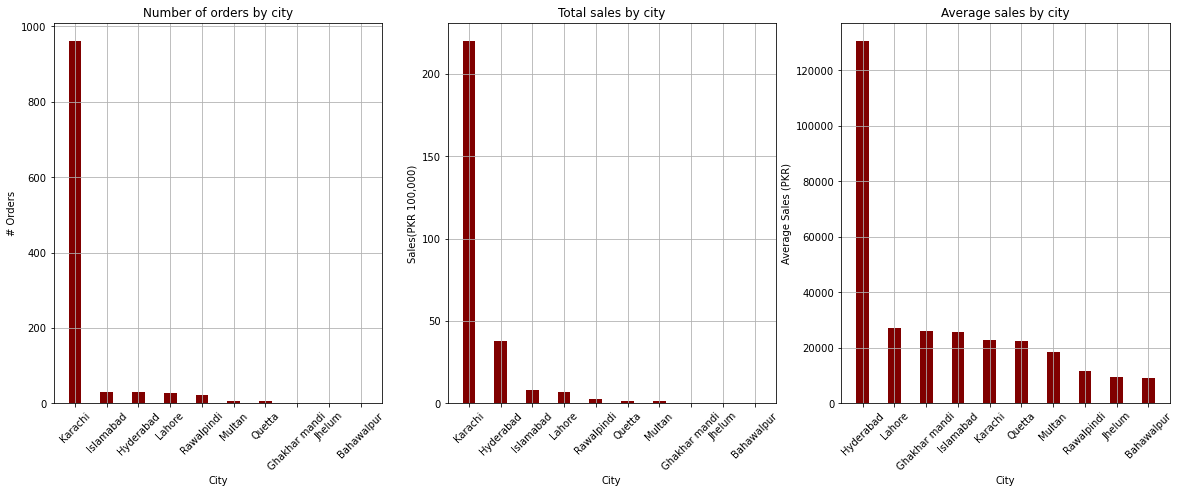

In [8]:
# Get the total number of orders by per city
city_orders = completed_orders['City (Billing)'].value_counts().sort_values(ascending=False)

# Get the total sales per city
city_total_sales = completed_orders.groupby('City (Billing)')['Order Total Amount'].sum().sort_values(ascending=False)
city_total_sales = city_total_sales/100000

# Get the average sales per city
city_avg_sales = completed_orders.groupby('City (Billing)')['Order Total Amount'].mean().sort_values(ascending=False)

# Plot the data
fig, axes = plt.subplots(1,3, figsize=(20,7))

axes[0].bar(city_orders.index, city_orders.values, color = 'maroon', width = 0.4)
axes[0].set_xticklabels(city_orders.index, rotation=45)
axes[0].set(title = "Number of orders by city", xlabel ='City', ylabel = '# Orders')

axes[1].bar(city_total_sales.index, city_total_sales.values, color = 'maroon', width = 0.4)
axes[1].set_xticklabels(city_total_sales.index, rotation=45)
axes[1].set(title = "Total sales by city", xlabel = 'City', ylabel='Sales(PKR 100,000)')

axes[2].bar(city_avg_sales.index, city_avg_sales.values, color = 'maroon', width = 0.4)
axes[2].set_xticklabels(city_avg_sales.index, rotation=45)
axes[2].set(title = "Average sales by city", xlabel = 'City', ylabel='Average Sales (PKR)')

for ax in axes:
    ax.grid()

fig.savefig(f'../data/output/city.png', facecolor='w', bbox_inches="tight")

#### Plotting sales distributions by payment method

/Users/hassansaad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app
/Users/hassansaad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/hassansaad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator


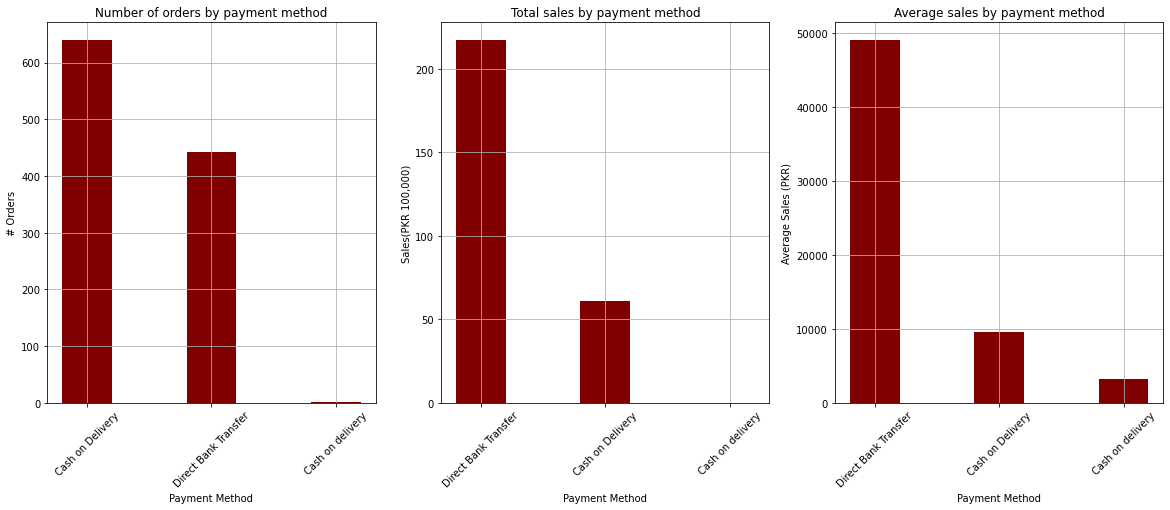

In [9]:
# Get the total number of orders by payment method 
payment_orders = completed_orders['Payment Method Title'].value_counts().sort_values(ascending=False)

# Get the total sales per payment method
payment_total_sales = completed_orders.groupby('Payment Method Title')['Order Total Amount'].sum().sort_values(ascending=False)
payment_total_sales = payment_total_sales/100000

# Get the average sales per payment method
payment_avg_sales = completed_orders.groupby('Payment Method Title')['Order Total Amount'].mean().sort_values(ascending=False)

# Create plot
fig, axes = plt.subplots(1,3, figsize=(20,7))

axes[0].bar(payment_orders.index, payment_orders.values, color = 'maroon', width = 0.4)
axes[0].set_xticklabels(payment_orders.index, rotation=45)
axes[0].set(title = "Number of orders by payment method", xlabel ='Payment Method', ylabel = '# Orders')

axes[1].bar(payment_total_sales.index, payment_total_sales.values, color = 'maroon', width = 0.4)
axes[1].set_xticklabels(payment_total_sales.index, rotation=45)
axes[1].set(title = "Total sales by payment method", xlabel = 'Payment Method', ylabel='Sales(PKR 100,000)')

axes[2].bar(payment_avg_sales.index, payment_avg_sales.values, color = 'maroon', width = 0.4)
axes[2].set_xticklabels(payment_avg_sales.index, rotation=45)
axes[2].set(title = "Average sales by payment method", xlabel = 'Payment Method', ylabel='Average Sales (PKR)')

for ax in axes:
    ax.grid()

plt.savefig(f'../data/output/payment_method.png', facecolor='w', bbox_inches="tight")

#### Plotting sales distribution by month

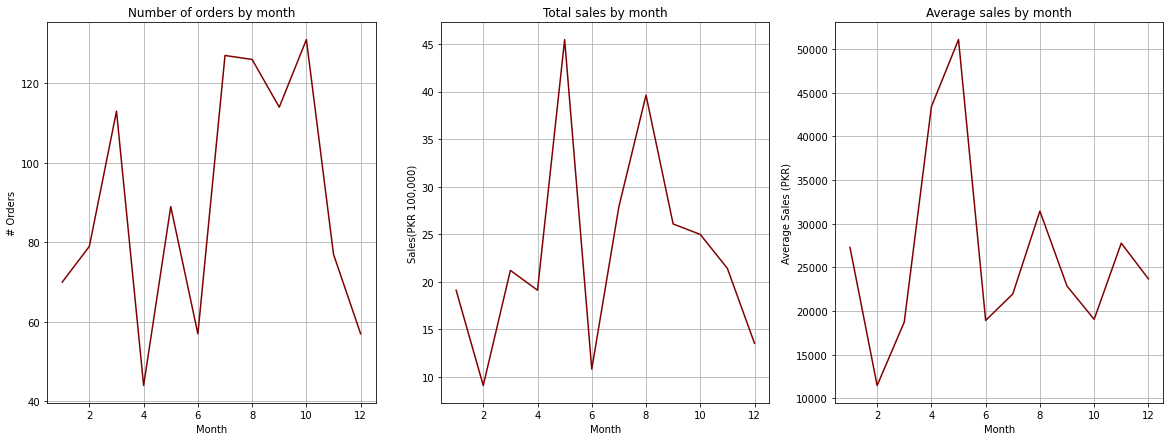

In [10]:
# Plot the number of orders by month of year
monthly_orders = completed_orders['month'].value_counts().sort_index()

# Get the total sales per month
monthly_total_sales = completed_orders.groupby('month')['Order Total Amount'].sum().sort_index()
monthly_total_sales = monthly_total_sales/100000

# Get the average sales per month
monthly_avg_sales = completed_orders.groupby('month')['Order Total Amount'].mean().sort_index()

# Create plot
fig, axes = plt.subplots(1,3, figsize=(20,7))

axes[0].plot(monthly_orders.index, monthly_orders.values, color = 'maroon')
axes[0].set(title = "Number of orders by month", xlabel ='Month', ylabel = '# Orders')

axes[1].plot(monthly_total_sales.index, monthly_total_sales.values, color = 'maroon')
axes[1].set(title = "Total sales by month", xlabel = 'Month', ylabel='Sales(PKR 100,000)')

axes[2].plot(monthly_avg_sales.index, monthly_avg_sales.values, color = 'maroon')
axes[2].set(title = "Average sales by month", xlabel = 'Month', ylabel='Average Sales (PKR)')

for ax in axes:
    ax.grid()
    
plt.savefig(f'../data/output/monthly.png', facecolor='w', bbox_inches="tight")

#### Plotting sales distributions by hour of day 

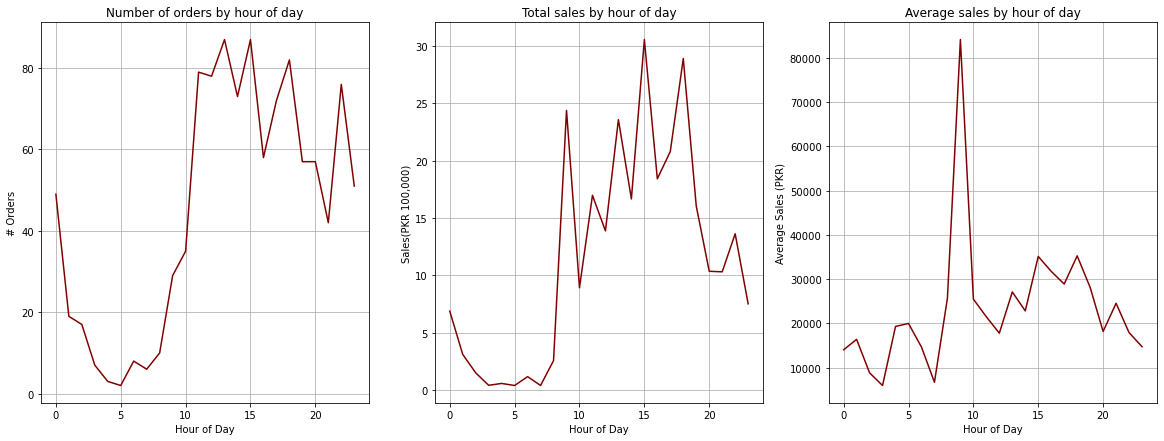

In [11]:
# Get the total number of orders by hour of day
hourly_orders = completed_orders['hour'].value_counts().sort_index()

# Get the total sales per hour of day
hourly_total_sales = completed_orders.groupby('hour')['Order Total Amount'].sum().sort_index()
hourly_total_sales = hourly_total_sales/100000

# Get the average sales per hour of day
hourly_avg_sales = completed_orders.groupby('hour')['Order Total Amount'].mean().sort_index()

# Create plot
fig, axes = plt.subplots(1,3, figsize=(20,7))

axes[0].plot(hourly_orders.index, hourly_orders.values, color = 'maroon')
axes[0].set(title = "Number of orders by hour of day", xlabel ='Hour of Day', ylabel = '# Orders')

axes[1].plot(hourly_total_sales.index, hourly_total_sales.values, color = 'maroon')
axes[1].set(title = "Total sales by hour of day", xlabel = 'Hour of Day', ylabel='Sales(PKR 100,000)')

axes[2].plot(hourly_avg_sales.index, hourly_avg_sales.values, color = 'maroon')
axes[2].set(title = "Average sales by hour of day", xlabel = 'Hour of Day', ylabel='Average Sales (PKR)')

for ax in axes:
    ax.grid()
plt.savefig(f'../data/output/hour_of_day.png', facecolor='w', bbox_inches="tight")

#### Plotting sales distributions by day of week

/Users/hassansaad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/hassansaad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/hassansaad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


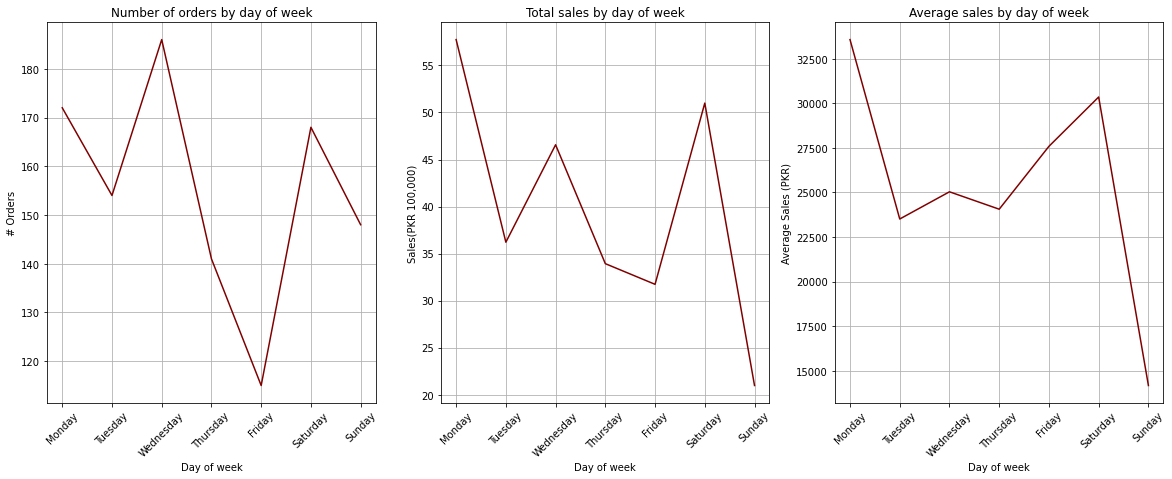

In [12]:
# Create ordered day of week list to reindex values
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Get the total number of orders by day of week
day_orders = completed_orders['day_of_week'].value_counts().reindex(cats)

# Get total sales by day of week
day_total_sales = completed_orders.groupby('day_of_week')['Order Total Amount'].sum().reindex(cats)
day_total_sales = day_total_sales/100000

# Get the average sales per day of week
day_avg_sales = completed_orders.groupby('day_of_week')['Order Total Amount'].mean().reindex(cats)

# Create plot
fig, axes = plt.subplots(1,3, figsize=(20,7))

axes[0].plot(day_orders.index, day_orders.values, color = 'maroon')
axes[0].set_xticklabels(day_orders.index, rotation=45)
axes[0].set(title = "Number of orders by day of week", xlabel ='Day of week', ylabel = '# Orders')

axes[1].plot(day_total_sales.index, day_total_sales.values, color = 'maroon')
axes[1].set_xticklabels(day_total_sales.index, rotation=45)
axes[1].set(title = "Total sales by day of week", xlabel = 'Day of week', ylabel='Sales(PKR 100,000)')

axes[2].plot(day_avg_sales.index, day_avg_sales.values, color = 'maroon')
axes[2].set_xticklabels(day_avg_sales.index, rotation=45)
axes[2].set(title = "Average sales by day of week", xlabel = 'Day of week', ylabel='Average Sales (PKR)')

for ax in axes:
    ax.grid()

plt.savefig(f'../data/output/day_of_week.png', facecolor='w', bbox_inches="tight")